# Pandas

![pandas](https://pandas.pydata.org/_static/pandas_logo.png)

Pandas is the de-facto way to analyze data in python, especially when it comes to business analytics and data science.

Pandas is built on top of numpy and helps us keep the Excel-like metaphor going as it helps us analyze the data in a tablular format, the same format that we are used to seeing in Excel with rows and columns.

Almost always, we can think of pandas **dataframes** as:

- rows = observations, rows in a database, etc

- columns = features, attributes, characteristics of the observations

# Getting Started

In [1]:
# import pandas -- the convention is to use pd
import numpy as np
import pandas as pd

# set the seed for reproducibility
np.random.seed(12345)

In [2]:
# how many data points do we want
SIZE = 5

# generate some data
letters = np.random.choice(['a','b','c','d','e'], size=SIZE, replace=True)
numbers = np.random.randint(10, size=SIZE)

# create the dictionary
d = {'a': letters, 'b': numbers}
d

{'a': array(['c', 'b', 'e', 'b', 'c'], dtype='<U1'),
 'b': array([1, 6, 1, 9, 7])}

In [3]:
# create the dictionary
df = pd.DataFrame(d)
df

,a,b
0,c,1
1,b,6
2,e,1
3,b,9
4,c,7


> We are finally starting to look at data that appear to be Excel-like, right!

![df-overview](https://cdn-images-1.medium.com/max/1600/1*6p6nF4_5XpHgcrYRrLYVAw.png)

What do we have:

- Columns have names that we will be able to use as a index to "lookup" that column

- From above, note that all of the columns are of the same type.  You can think of these as numpy arrays.

- Rows have indexes, which is why we spent so much time going over how to work with them. **Like all of python, they start with zero!**

- The intersection of the rows and columns are the values, just like in Excel.  We will later learn that we can extract the value just like would do in Excel with value A1, or D5

## Before we continue:

It's worth noting that this point, please be careful when use the Google machine to find answers.  Currently pandas is not at version 1.0 (but extremely stable).

I bring this up because the core development team is deprecating some features that have been with pandas from the beginning, but are hard to maintain and are not widely used at all.

When looking at tutorials, do not worry about:

- pandas panel data
- indexing with `idx`

First and foremost, I want your code to run and behave as you expected, but I don't want you to build muscle memory using older features.

Lastly, later this semester we will get into Timeseries data.  Pandas dataframes were created by Wes Mckenney, who, at the time, didn't have the tooling he needed to handle financial and time series data in R `dataframes`.  

He borrowed the dataframe concept from R, but taillored it to fit within python and handle timeseries data the way he saw fit.

# Dataframes 101



## Loading data

Let's bring in a CSV dataset.  This could be a file that is on your computer (or Google's server), but in our case, it will be a publicly available dataset from the web.

In [4]:
# define the url for our dataset
url = "https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv"

# read the csv from the web into a pandas dataframe
cars = pd.read_csv(url)

# print out the first few ros
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2




What we just did was load the data from a csv file using `read_csv` and print out the first 5 rows of data as a **dataframe**.  

> This looks like Excel right?

In [70]:
# we can also look at the bottom (tail of the data) and specify
# in either case how many rows we want
cars.tail(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.77,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


In [5]:
# let's see the other read methods -- hit tab!
pd.read

AttributeError: module 'pandas' has no attribute 'read'

## Inspection

Just like we could with other objects, we can take a look at what we have with a variety of methods. We just used the `head()` method, but what else should we look at when we first load in a dataset?

### The shape

In [6]:
# what is the shape (rows, columns)
cars.shape

(32, 12)

### Columns

In [7]:
# get the column names
cars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

> Note:  We can see that columns came back as an index.  This will be used later, but for now, it's just worth calling it out.  More importantly, we see the column names returned as a list of values.  

Let's just confirm this:

In [8]:
cols = cars.columns
type(cols)

pandas.core.indexes.base.Index

In [9]:
## slice the list
cols[0:2]

Index(['model', 'mpg'], dtype='object')

In [10]:
## ok, not there just yet -- numpy array
cols2 = np.array(cars.columns)
cols2[0:2]

array(['model', 'mpg'], dtype=object)

In [11]:
## or a list -- remember type conversion!
cols3 = list(cars.columns)
cols3[0:2]

['model', 'mpg']

### Rows



In [12]:
cars.index

RangeIndex(start=0, stop=32, step=1)

> Just like with columns, we get an Index of sorts back.  Dont worry that it's a RangeIndex, but from the name alone, I am sure you can infer what that means.

From above, recall that we had 32 rows.  Does the output correlate to the shape?

The big thing is that rows are indexed, but we could have set this ourselves.

> Question:  Can you think of a use-case where you might want to set a **unique value** as an index so that you can call that value when looking up a row?

In [13]:
# going back to our first dataframe, df
row_labels = ['r1', 'r2', 'r3', 'r4', 'r5']
row_labels

['r1', 'r2', 'r3', 'r4', 'r5']

In [14]:
# current index
df.index

RangeIndex(start=0, stop=5, step=1)

In [15]:
df.index = row_labels
df

,a,b
r1,c,1
r2,b,6
r3,e,1
r4,b,9
r5,c,7


In [16]:
# and if we wanted to get a row
## dont worry, will cover this later
df.loc[['r2']]

,a,b
r2,b,6


In [19]:
## to show this in our cars example, we can set the first column as the index
cars2 = pd.read_csv(url, index_col=0)
cars2.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [29]:
type(cars2)

pandas.core.frame.DataFrame

In [30]:
cars2.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [31]:
cars2.index

Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype='object', name='model')

### Describe

Out of the box, it's easy to descibe your dataset. 

Let's use our original cars dataframe.

In [32]:
# print the dataset for quick reference
cars.head(n=3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [33]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


> What's show above?  

> What's not shown above

In [34]:
## get the column types for our dataframe
cars.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

## Column Subsetting


### Subsetting 1 Column

Just like we did with lists, we can slice, or subset, columns.  That is, we can grab columns of interest.

In [42]:
# lets isolate mpg
mpg = cars['mpg']
type(mpg)

pandas.core.series.Series

> We see that pandas calls the underlying data a Series, which goes back to the timeseries roots.  That's fine, it's just a numpy array.

#### Series

In [43]:
mpg[0:5]

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

However, the Series allows us to access methods that were built to help with EDA.

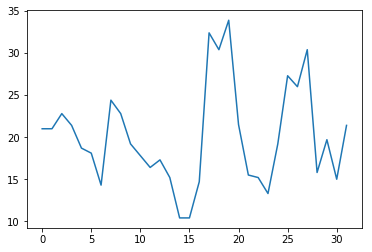

In [45]:
## for example, we can plot the series
%matplotlib inline
mpg.plot()

> Can you interpret this plot?


> PROTIP:  For a quick way to get plots out of your notebooks, especially in Google Colab, right-click, Save as Image.

In [38]:
## from above, we extracted the column as a series
print(type(mpg))

## we can force it to be a dataframe with [[]]
mpg2 = cars[['mpg']]
print(type(mpg2))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


If the need arises, it's pretty simple to create a series on the fly.

In [69]:
myseries = pd.Series([1, 2, 4, np.nan, 5, None, 7])
myseries

0    1.0
1    2.0
2    4.0
3    NaN
4    5.0
5    NaN
6    7.0
dtype: float64

#### Missing Values

This is our first exposure to missing values, but from above the big takeaway is that None and NaN, which is generated via numpy are the same, and are missing values from our column of data.  

Again, a Series could be viewed as singular column of data in Excel, with some values missing

### Subsetting 2+ columns

In [46]:
## we can also subset multiple columns
cols2 = cars[['mpg', 'carb']]
type(cols2)

pandas.core.frame.DataFrame

In [47]:
cols2.head()

,mpg,carb
0,21.0,4
1,21.0,4
2,22.8,1
3,21.4,1
4,18.7,2


In [48]:
# note that this was just a list -- we can pass alist
# BOTH METHODS are the same

col_list = ['mpg', 'carb']

cars[col_list].head()

,mpg,carb
0,21.0,4
1,21.0,4
2,22.8,1
3,21.4,1
4,18.7,2


## Robust Subsetting of Rows and Columns

![](http://104.236.88.249/wp-content/uploads/2016/10/Pandas-selections-and-indexing.png)

![](https://o.quizlet.com/gTPmJIVzpKPgB07nAt76zQ.jpg)

The two images above are helpful to think of the two ways to filter data within a pandas dataframe:

- loc = use index names, which can be default 0 -...., or as we saw in cars2, we set the row names.  Remember the column names are also index names, but may not be unique

- iloc = instead of the index names, we use the positions, just like we did when slicing up lists and arrays.  It's about the position which is zero-based.

From the first image, you see that just like a 2-dimensional array in numpy, we can use the `,` to seperate out how we slice between `rows`:`columns`

> I like the second image above.  It's more concise, and paints out how to reference the axis, but the two combined are a good reference for how to select rows and columsn

![](https://www.treasuretrails.co.uk/hidden-treasure/wp-content/uploads/2015/04/Question.png)

Why do we care about filtering rows and columns? 

### Filter rows

In [54]:
# going back to cars, lets select the first few rows
cars.iloc[0:3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [49]:
# filter a list specified rows
myrows = [0,1,4]
cars.iloc[myrows]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [50]:
# now use cars 2 -- just a refresher what it looks like
cars2.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [60]:
# we can use loc 
cars2.loc['Datsun 710']

mpg      22.80
cyl       4.00
disp    108.00
hp       93.00
drat      3.85
wt        2.32
qsec     18.61
vs        1.00
am        1.00
gear      4.00
carb      1.00
Name: Datsun 710, dtype: float64

In [63]:
## remember, if it doesnt print a dataframe, pass a list as the argument
cars2.loc[['Datsun 710', 'Hornet 4 Drive']]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1


In [64]:
# loc is not reserved for set row indexes or columns
# using the default index from cars
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [65]:
cars.loc[[0,1,4]]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Filter rows and cols

In [55]:
## select the first three rows and columns
cars.iloc[0:3, 0:3]

,model,mpg,cyl
0,Mazda RX4,21.0,6
1,Mazda RX4 Wag,21.0,6
2,Datsun 710,22.8,4


In [67]:
## we can use loc too as well as a sequence and list combined
cars.loc[0:3, ['mpg', 'carb']]

,mpg,carb
0,21.0,4
1,21.0,4
2,22.8,1
3,21.4,1


> Note from above, loc is referencing the column names

![](https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/intermediary/f/76d278b2-6300-4cc2-8ea5-33ebcd936a93/d4r45k7-e6938e65-c68a-42f8-b46c-33fd1371f104.jpg/v1/fill/w_1131,h_707,q_70,strp/move_fast_and_break_things_by_kefirbertulli_d4r45k7-pre.jpg)

Remember, you 99.99999999999999999999% of the times wont break things, so try and see if it works.  

Plus, in Collab, this isn't your local machine, let Google worry about it!